# Main

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import re as re
import time
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Webscrapping

### Importing BBC webscrapping

In [2]:
import src.BBC_webscrapping as bbc

In [ ]:
df_bbc_russia = bbc.keyword('Russia',200)
df_bbc_china = bbc.keyword('China',200)

### Importing CNN webscrapping

In [3]:
import src.CNN_webscrapping as cnn

In [ ]:
df_cnn_russia = cnn.keyword('Russia',200)
df_cnn_china = cnn.keyword('China',200)

### Importing Peoples's  Daily Online

In [4]:
import src.peoples_webscrapping as pdo

In [ ]:
df_united_states = pdo.keyword('United States',60)
df_usa = pdo.keyword('USA',60)
df_uk = pdo.keyword('UK',60)
df_united_kingdom = pdo.keyword('United Kingdom',60)

In [ ]:
df_pd_us=pd.concat([df_united_states,df_usa])
df_pd_uk=pd.concat([df_uk,df_united_kingdom])

### Importing RT webscrapping

In [5]:
import src.RT_webscrapping as rt

In [ ]:
df_united_states = rt.keyword('United States',100)
df_usa = rt.keyword('USA',100)
df_united_kingdom = rt.keyword('United Kingdom',100)
df_uk = rt.keyword('uk',100)

In [ ]:
df_rt_us= pd.concat([df_united_states,df_usa])
df_rt_uk=pd.concat([df_united_kingdom,df_uk])

### - not required- Saving raw data into CSV 

In [ ]:
df_bbc_china.to_csv('data/raw/bbc_china.csv',index=False) 
df_bbc_russia.to_csv('data/raw/bbc_russia.csv',index=False)
df_cnn_china.to_csv('data/raw/cnn_china.csv',index=False)
df_cnn_russia.to_csv('data/raw/cnn_russia.csv',index=False)
df_pd_us.to_csv('data/raw/pdo_united_states.csv',index=False)
df_pd_uk.to_csv('data/raw/pdo_united_kingdom.csv',index=False) 
df_rt_us.to_csv('data/raw/rt_united_states.csv',index=False)  
df_rt_uk.to_csv('data/raw/rt_united_kingdom.csv',index=False)  

## Natural Languaje, Subjectivity and Polarity analysis

### Importing functions

In [2]:
import src.NLTK_analysis as nk

### - Not required - Importing raw files

In [3]:
df_bbc_china=pd.read_csv('data/raw/bbc_china.csv')
df_bbc_russia=pd.read_csv('data/raw/bbc_russia.csv')
df_cnn_china=pd.read_csv('data/raw/cnn_china.csv')
df_cnn_russia=pd.read_csv('data/raw/cnn_russia.csv')
df_pd_us=pd.read_csv('data/raw/pdo_united_states.csv')
df_pd_uk=pd.read_csv('data/raw/pdo_united_kingdom.csv')
df_rt_us=pd.read_csv('data/raw/rt_united_states.csv')
df_rt_uk=pd.read_csv('data/raw/rt_united_kingdom.csv')

### Applying to BBC

- China

In [4]:
df_bbc_china = nk.preprocess(df_bbc_china)
df_bbc_china=nk.add_column(df_bbc_china,'source','bbc')
df_bbc_china=nk.add_column(df_bbc_china,'topic','china')
df_bbc_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
111,Two Sessions: China looks at reforms to deepen...,Two Sessions: China looks at reforms to deepen...,https://www.bbc.co.uk/news/world-asia-china-64...,5,3,2023,"[xi, china, party, sessions, jinping, communis...",0.359194,0.076162,5/3/2023,bbc,china


- Russia

In [5]:
df_bbc_russia = nk.preprocess(df_bbc_russia)
df_bbc_russia=nk.add_column(df_bbc_russia,'source','bbc')
df_bbc_russia=nk.add_column(df_bbc_russia,'topic','russia')
df_bbc_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
48,Ukraine war: Blinken says China might give wea...,Ukraine war: Blinken says China might give wea...,https://www.bbc.co.uk/news/world-us-canada-646...,20,2,2023,"[china, russia, ukraine, blinken, weapons, wan...",0.353818,0.013055,20/2/2023,bbc,russia


### Applying to CNN

- China

In [6]:
df_cnn_china = nk.preprocess(df_cnn_china)
df_cnn_china=nk.add_column(df_cnn_china,'source','cnn')
df_cnn_china=nk.add_column(df_cnn_china,'topic','china')
df_cnn_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
161,Putin and China's top diplomat pledge to stren...,Putin and China's top diplomat pledge to stre...,https://www.cnn.com/2023/02/22/china/china-wan...,22,2,2023,"[china, wang, russia, ukraine, putin, united, ...",0.281266,0.076943,22/2/2023,cnn,china


- Russia

In [7]:
df_cnn_russia = nk.preprocess(df_cnn_russia)
df_cnn_russia=nk.add_column(df_cnn_russia,'source','cnn')
df_cnn_russia=nk.add_column(df_cnn_russia,'topic','russia')
df_cnn_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
66,Ales Bialiatski: Nobel laureate sentenced to 1...,Ales Bialiatski: Nobel laureate sentenced to ...,https://www.cnn.com/2023/03/03/europe/ales-bia...,3,3,2023,"[bialiatski, years, nobel, belarusian, america...",0.31226,0.094422,3/3/2023,cnn,russia


### Applying to People's Daily Online

- United States of America

In [8]:
df_pd_us = nk.preprocess(df_pd_us)
df_pd_us=nk.add_column(df_pd_us,'source','pdo')
df_pd_us=nk.add_column(df_pd_us,'topic','usa')
df_pd_us.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
92,U.S. witnesses bloodiest weekend of gun violen...,U.S. witnesses bloodiest weekend of gun violen...,http://english.people.com.cn/n3/2023/0224/c900...,24,2,2023,"[gun, shootings, weekend, violence, mass, stat...",0.432143,0.067078,24/2/2023,pdo,usa


- United Kingdom

In [9]:
df_pd_uk = nk.preprocess(df_pd_uk)
df_pd_uk=nk.add_column(df_pd_uk,'source','pdo')
df_pd_uk=nk.add_column(df_pd_uk,'topic','uk')
df_pd_uk.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
82,Global vaccine accessibility urged as Western ...,Global vaccine accessibility urged as Western ...,http://english.people.com.cn/n3/2023/0205/c900...,5,2,2023,"[countries, vaccines, vaccine, doses, global, ...",0.360931,0.140398,5/2/2023,pdo,uk


### Applying to RT

- United States of America

In [10]:
df_rt_us = nk.preprocess(df_rt_us)
df_rt_us=nk.add_column(df_rt_us,'source','rt')
df_rt_us=nk.add_column(df_rt_us,'topic','usa')
df_rt_us.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
68,Fentanyl is American problem – Mexican preside...,Fentanyl is American problem – Mexican...,https://www.rt.com/news/572785-amlo-blames-us-...,2023,3,10,"[fentanyl, drug, americans, mexican, mexico, a...",0.296474,0.106731,10/3/2023,rt,usa


- United Kingdom

In [11]:
df_rt_uk = nk.preprocess(df_rt_uk)
df_rt_uk=nk.add_column(df_rt_uk,'source','rt')
df_rt_uk=nk.add_column(df_rt_uk,'topic','uk')
df_rt_uk.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
59,"In the battle for the ‘Global South’, an ancie...","In the battle for the ‘Global South’, ...",https://www.rt.com/news/564474-west-battle-glo...,2022,10,12,"[global, south, western, north, divide, putin,...",0.320744,0.04053,12/10/2022,rt,uk


### Saving all the DF's in one for visualisation

In [12]:
df_together = pd.concat([df_bbc_china,df_bbc_russia,df_cnn_china,df_cnn_russia,df_pd_us,df_pd_uk,df_rt_us, df_rt_uk])
df_together.to_csv('data/dfcomplete.csv',index=False)

### wordcloud

In [13]:
import src.wordcloud as wc

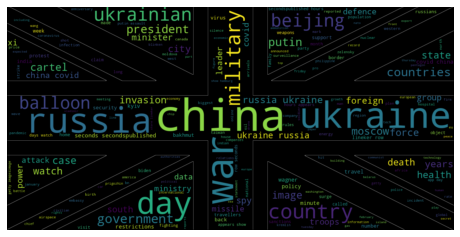

In [14]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china])
bbc_pic=wc.wordcloud(df_bbc,'uk.png')

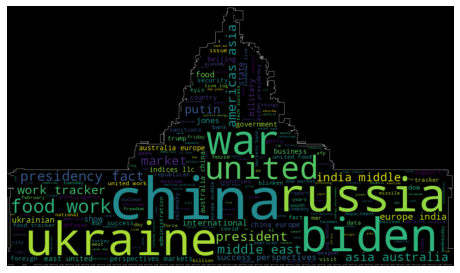

In [15]:
df_cnn=pd.concat([df_cnn_russia,df_cnn_china])
wc.wordcloud(df_cnn,'usa.png')

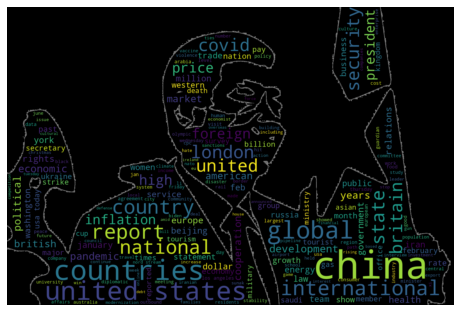

In [16]:
df_pd=pd.concat([df_pd_uk,df_pd_us])
wc.wordcloud(df_pd,'china.png')

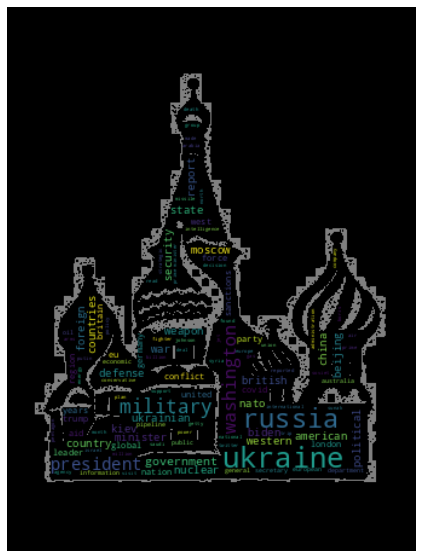

In [17]:
df_rt=pd.concat([df_rt_uk,df_rt_us])
wc.wordcloud(df_rt,'russia.png')

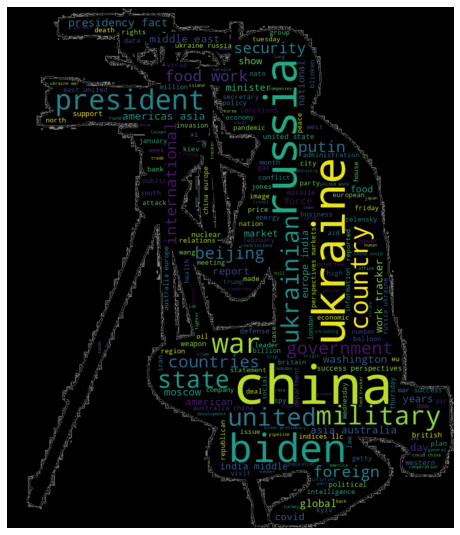

In [18]:
wc.wordcloud(df_together,'press.png')

### Create DF to save a list of most common words used by western and eastern for visualisation

In [19]:
df_words = nk.list_words(df_together)
df_west_words= pd.concat([nk.list_words(df_bbc),nk.list_words(df_cnn)])
df_east_words= pd.concat([nk.list_words(df_pd), nk.list_words(df_rt)])

In [20]:
df_words.to_csv ('data/words.csv',index=False)
df_west_words.to_csv('data/west_words.csv',index=False)
df_east_words.to_csv('data/east_words.csv',index=False)